In [1]:
#required libraries
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings   

#Now let’s read the train and test data

train=pd.read_csv("DailyDelhiClimateTrain.csv", ) 
test=pd.read_csv("DailyDelhiClimateTest.csv")
#Let’s make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

train_original=train.copy() 
test_original=test.copy()

#train.columns, test.columns
#(Index(['ID', 'Datetime', 'Count'], dtype='object'),
#Index(['ID', 'Datetime'], dtype='object'))
#We have ID, Datetime and corresponding count of passengers in the train file. For test file we have ID and Datetime only so we have to predict the Count for test file.


test.head()
train.first

<bound method NDFrame.first of             date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>

In [8]:
train.head, test.head

(<bound method NDFrame.head of             date   meantemp    humidity  wind_speed  meanpressure
 0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
 1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
 2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
 3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
 4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
 ...          ...        ...         ...         ...           ...
 1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
 1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
 1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
 1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
 1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000
 
 [1462 rows x 5 columns]>,
 <bound method NDFrame.head of            date   meantemp   humidity  wind_speed  meanpressure
 0    2017-01-01  15.913043  85.869565    

In [4]:
train.columns, test.columns

(Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object'),
 Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(date             object
 meantemp        float64
 humidity        float64
 wind_speed      float64
 meanpressure    float64
 dtype: object,
 date             object
 meantemp        float64
 humidity        float64
 wind_speed      float64
 meanpressure    float64
 dtype: object)

In [6]:
train.shape, test.shape

((1462, 5), (114, 5))

In [13]:

train['date'] = pd.to_datetime(train.date,format='%Y-%m-%d %H:%M') 
test['date'] = pd.to_datetime(test.date,format='%Y-%m-%d %H:%M')
test_original['date'] = pd.to_datetime(test_original.date,format='%Y-%m-%d %H:%M') 
train_original['date'] = pd.to_datetime(train_original.date,format='%Y-%m-%d %H:%M')

In [16]:
for i in (train, test, test_original, train_original):
    i['year']=i.date.dt.year 
    i['month']=i.date.dt.month 
    i['day']=i.date.dt.day
    i['Hour']=i.date.dt.hour

In [17]:
train['day of week']=train['date'].dt.dayofweek 
temp = train['date']

In [18]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['date'].apply(applyer) 
train['weekend']=temp2

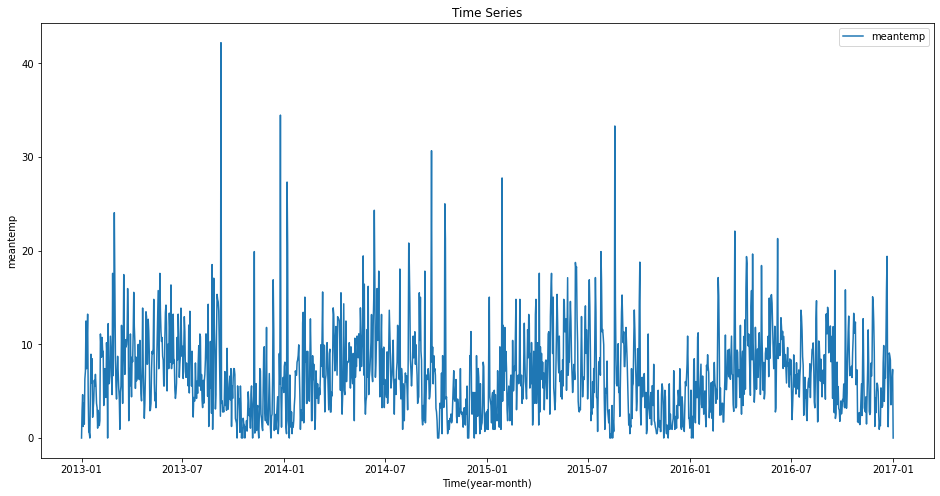

In [31]:
train.index = train['date'] # indexing the Datetime to get the time period on the x-axis. 
#df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = train['wind_speed'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='meantemp') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("meantemp") 
plt.legend(loc='best')

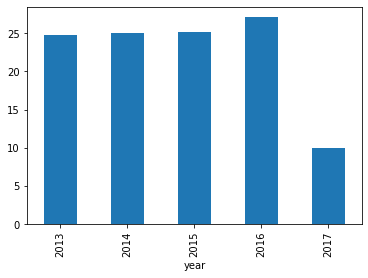

In [32]:
train.groupby('year')['meantemp'].mean().plot.bar()

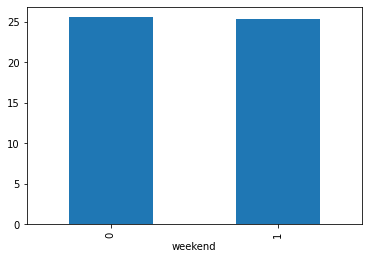

In [33]:
train.groupby('weekend')['meantemp'].mean().plot.bar()

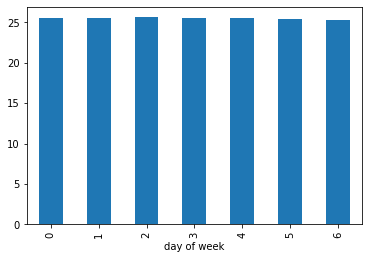

In [34]:
train.groupby('day of week')['meantemp'].mean().plot.bar()